# Análise dos óbitos

In [27]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

caminho_2019 = '../dados/obitos-2019.csv'
caminho_2020 = '../dados/obitos-2020.csv'

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12386, 6)
2020 (14931, 6)


In [2]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [3]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
13733,PE,OUTRAS,OUTROS_SERVICOS_SAUDE,> 100,F,9
2434,PR,PNEUMONIA,OUTROS_SERVICOS_SAUDE,20 - 29,M,3
9037,MA,SRAG,DOMICILIO,70 - 79,M,10
7521,MT,OUTRAS,HOSPITAL,60 - 69,F,199
2202,MS,SEPTICEMIA,HOSPITAL,20 - 29,F,12


In [4]:
len(dados_2019.uf.unique())

27

In [5]:
len(dados_2020.uf.unique())


27

In [6]:
dados_2020.tipo_doenca.unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [7]:
dados_2020.tipo_doenca.value_counts()

OUTRAS                        3804
INSUFICIENCIA_RESPIRATORIA    2335
PNEUMONIA                     2216
COVID                         2112
SEPTICEMIA                    2033
INDETERMINADA                 1348
SRAG                          1083
Name: tipo_doenca, dtype: int64

In [8]:
dados_2019.tipo_doenca.value_counts()

OUTRAS                        3847
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2325
SEPTICEMIA                    2065
INDETERMINADA                 1308
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [18]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca').sum()
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6990
INSUFICIENCIA_RESPIRATORIA,100619
OUTRAS,660814
PNEUMONIA,226368
SEPTICEMIA,175545
SRAG,1498


In [14]:
total_obitos_2020 = dados_2020.groupby('tipo_doenca').sum()
total_obitos_2020

,total
tipo_doenca,
COVID,195904
INDETERMINADA,9719
INSUFICIENCIA_RESPIRATORIA,99032
OUTRAS,690973
PNEUMONIA,182168
SEPTICEMIA,162968
SRAG,16569


In [19]:
proporcao = total_obitos_2020 / total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,195904.000000
INDETERMINADA,1.390415
INSUFICIENCIA_RESPIRATORIA,0.984228
OUTRAS,1.045639
PNEUMONIA,0.804743
SEPTICEMIA,0.928355
SRAG,11.060748


## Criar uma função para visualização

In [31]:
def grafico_comparativo(causa):
    # preparação dos dados
    total_2019 = dados_2019.groupby('tipo_doenca').sum()
    total_2020 = dados_2020.groupby('tipo_doenca').sum()
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    dados = pd.DataFrame({'Ano' : [2019, 2020], 'Total' : lista})

    # formação do gráfico
    plt.figure(figsize=(9,6))
    sns.barplot(x='Ano', y='Total', data=dados)
    plt.title(f'Óbitos por {causa}')
    plt.show()

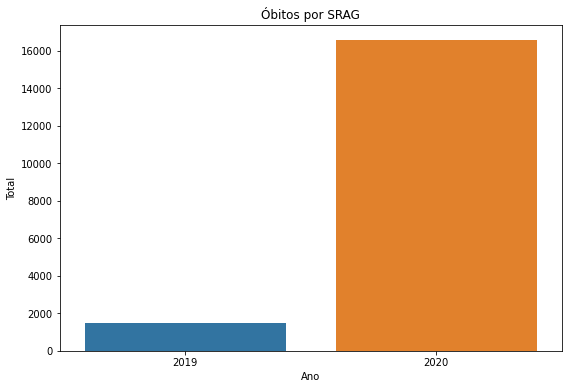

In [32]:
grafico_comparativo('SRAG')

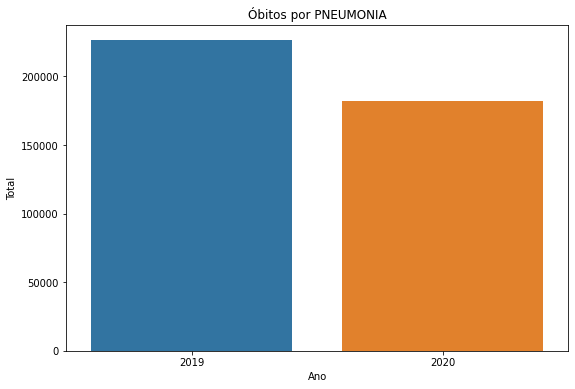

In [33]:
grafico_comparativo('PNEUMONIA')